# Predicting the Advertising sales 
This data set is downloaded from kaggle link https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [13]:
df = pd.read_csv("Advertising.csv", index_col=0)

In [15]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [17]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


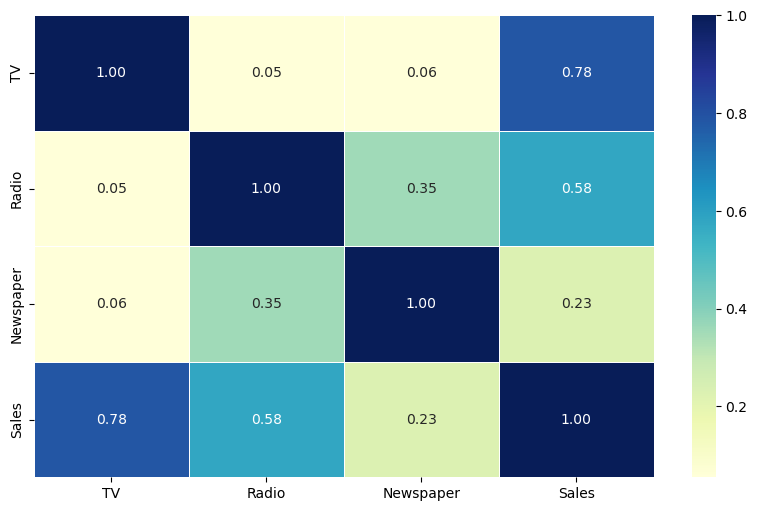

In [24]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt = ".2f",
                 cmap="YlGnBu")

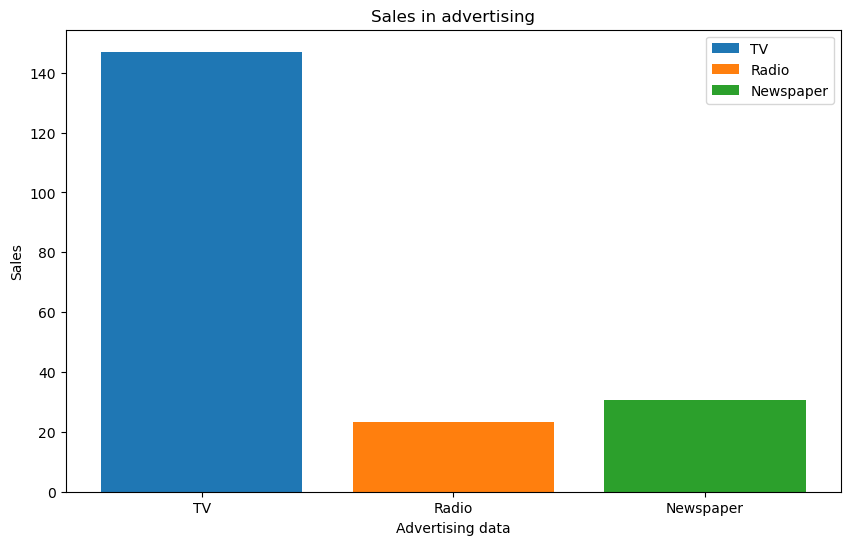

In [25]:
plt.figure(figsize=(10,6))
advertising_mediums = ["TV", "Radio", "Newspaper"]
x_positions = range(len(advertising_mediums))

for i, medium in enumerate(advertising_mediums):
    plt.bar(x_positions[i], df[medium].mean(), label=medium)

plt.xlabel("Advertising data")
plt.ylabel("Sales")
plt.title("Sales in advertising")
plt.xticks(x_positions, advertising_mediums)
plt.legend()
plt.show()

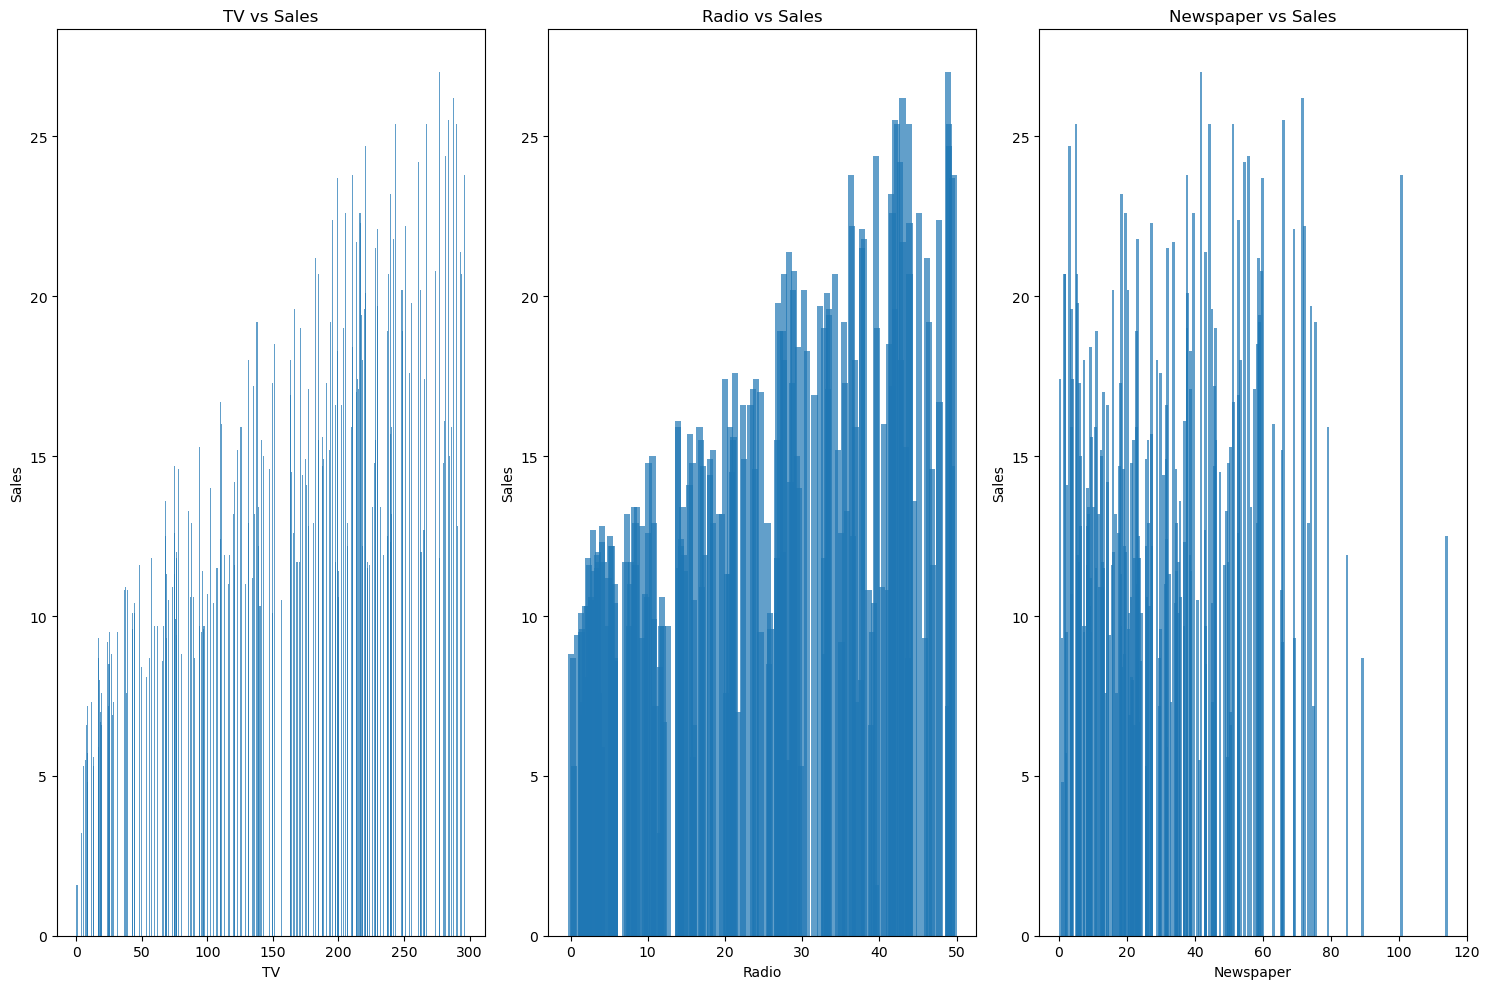

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))

advertising_mediums = ["TV", "Radio", "Newspaper"]

for i, medium in enumerate(advertising_mediums):
    ax[i].bar(df[medium], df["Sales"], alpha=0.7)
    ax[i].set_xlabel(medium)
    ax[i].set_ylabel("Sales")
    ax[i].set_title(f"{medium} vs Sales")

plt.tight_layout()
plt.show()

### Getting the data ready for the model

In [33]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [36]:
X = df.drop("Sales", axis=1)
y = df["Sales"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [40]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
model.score(X_test,y_test)

0.9817735345804848

In [44]:
y_pred = model.predict(X_test)

In [50]:
#Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("feature importance")
    ax.invert_yaxis()


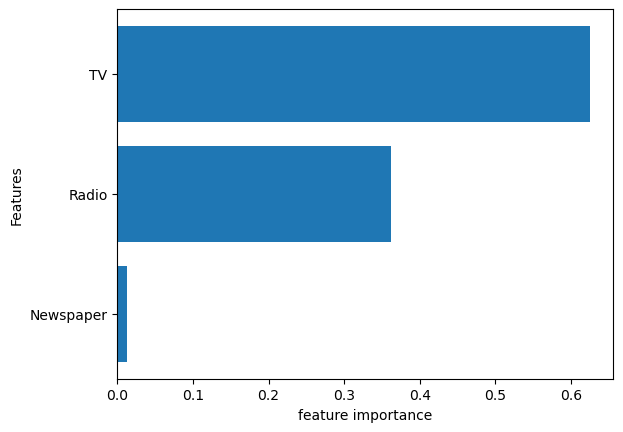

In [51]:
plot_features(X_train.columns, model.feature_importances_)